# Phishing Website detection using Machine Learning

In [2]:
pwd

'C:\\Users\\Hp'

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and reading the dataset

In [6]:
data =pd.read_csv('phishing.csv')

#displaying the first 10 rows
data.head(5)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [7]:
#Displaying data in an easier manner to read

data.head(10).T

,0,1,2,3,4,5,6,7,8,9
index,1,2,3,4,5,6,7,8,9,10
having_IPhaving_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URLURL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1


In [8]:
#Displaying the shape of the dataset

data.shape

(11055, 32)

In [9]:
#Displaying the summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

# Data Preprocessing

Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [10]:
#Displaying the Stastical Summary of dataset
data.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. This resulted in the decision to drop the 'Domain' column from the dataset.

In [14]:

#Dropping the Domain column
data = data.drop(['index'], axis = 1).copy()

In [12]:
#Counting and checking for null values
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

To have the same range of feature values while splitting the data into training & testing sets, we need to shuffle the data

In [15]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,1,1,1,1,...,1,1,-1,1,0,-1,1,0,1,-1
1,-1,-1,1,-1,1,-1,-1,-1,1,1,...,1,-1,1,1,1,-1,-1,1,1,-1
2,1,1,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,0,-1,-1
3,1,-1,1,1,1,-1,-1,1,-1,-1,...,-1,1,1,-1,1,1,-1,1,1,1
4,1,-1,1,1,1,-1,1,1,1,1,...,1,1,-1,1,1,-1,1,0,1,1


Quick observation: The dataset has no null values. So further processing will not be done such as replace or deleting null rows. data is ready for traning, before training we visualise the data

# Visually Displaying Data

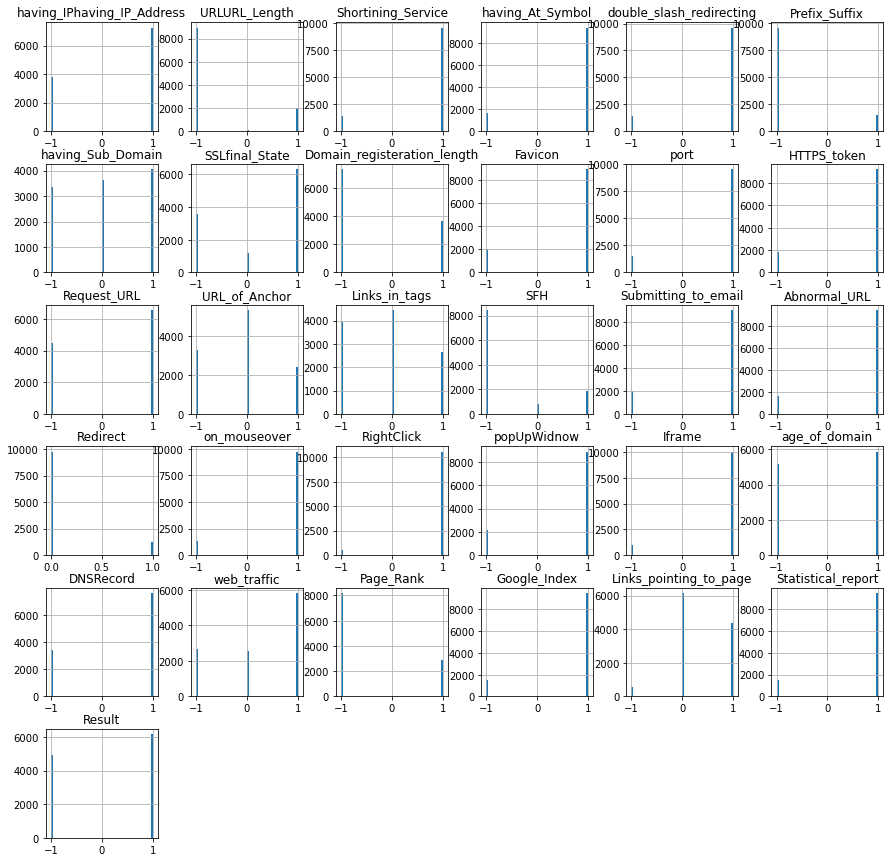

In [16]:
#Plotting the data distribution with a histogram
data.hist(bins = 50,figsize = (15,15))
plt.show()

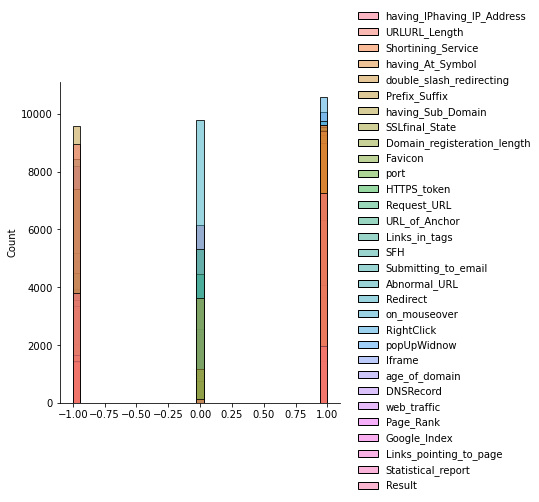

In [17]:
#overall distribution of continuous data variables
plot = sns.displot(data)

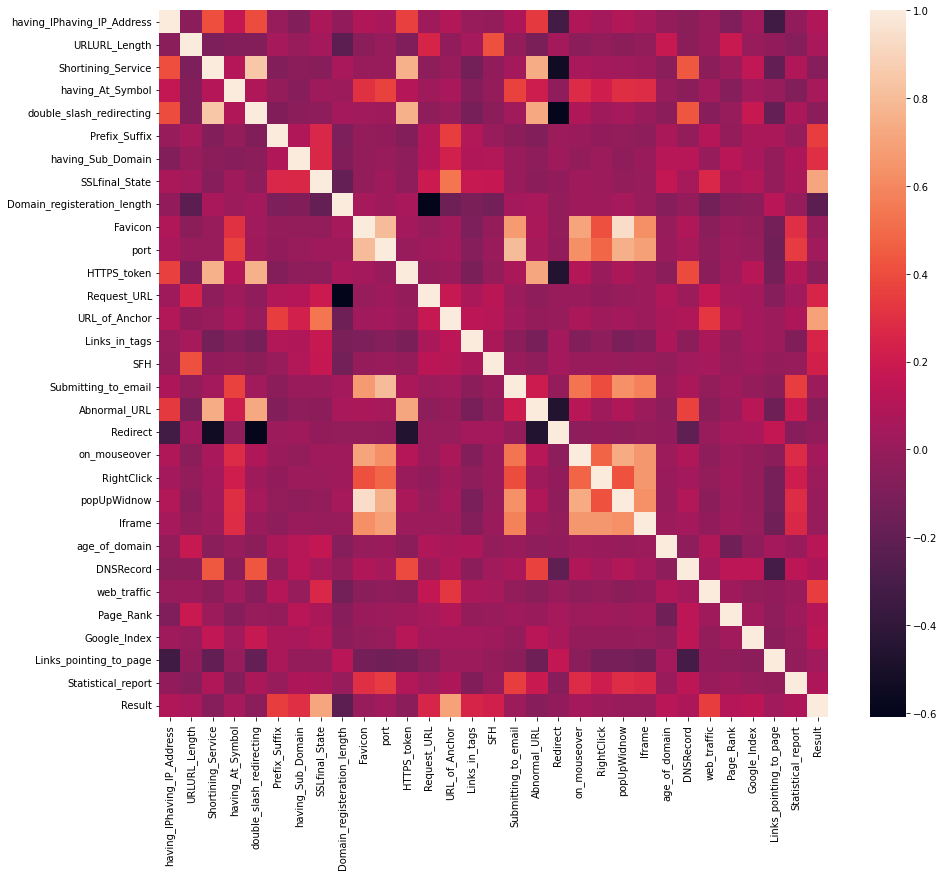

In [18]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

<AxesSubplot:>

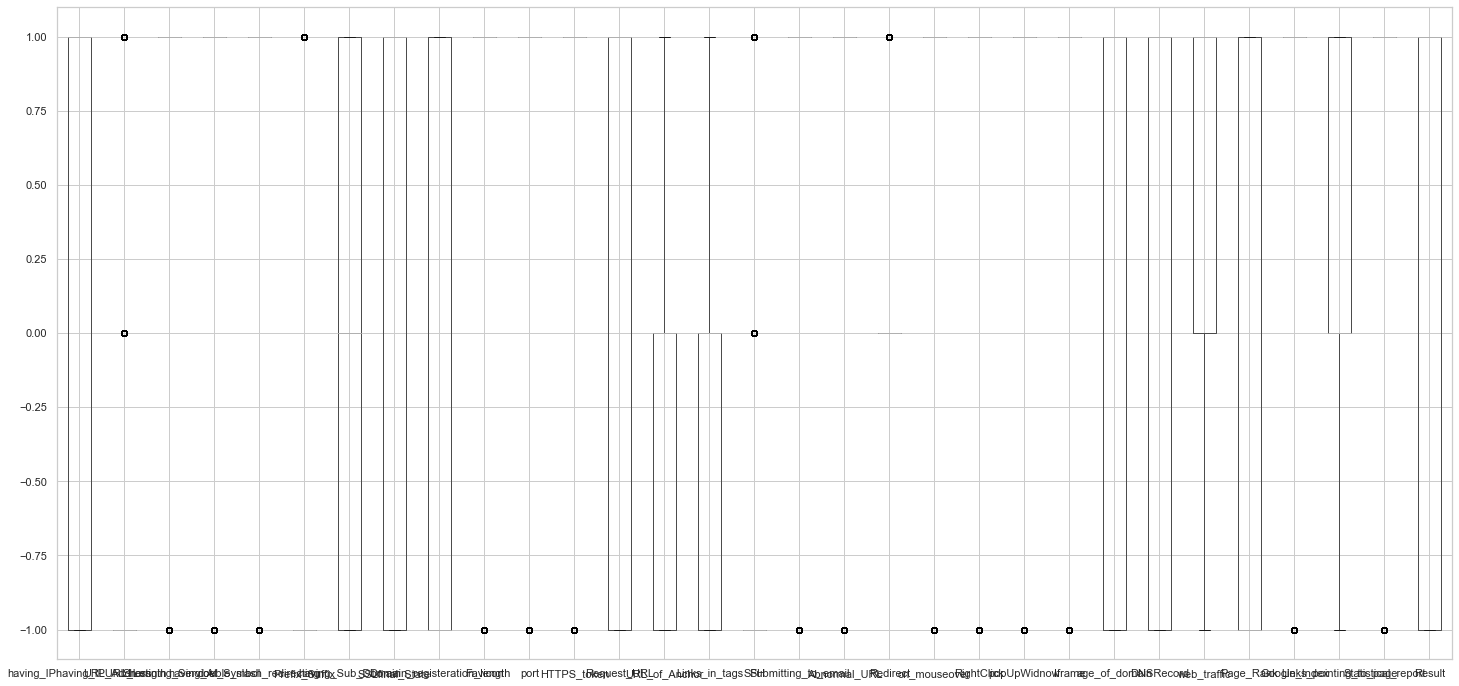

In [19]:
sns.set(style="whitegrid")
data.boxplot(figsize=(25,12))

In [21]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [23]:
# Sepratating & assigning features and target columns to X & y
y = data['Result']
X = data.drop('Result',axis=1)

In [24]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)

# Machine Learning

From the dataset above, We have learnt that this is a supervised machine learning. This dataset uses a classification problem, it has input URL classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

1.Decision Tree
2.LogisticRegression

In [25]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# DECISION TREE CLASSIFIER

In [29]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

tree_score=model.score(X_test, y_test)

Performance Evaluation

In [30]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on the Model: ",tree_score)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Decision Tree: Accuracy on the Model:  0.9348710990502035
Decision Tree: Accuracy on training Data: 0.926
Decision Tree: Accuracy on test Data: 0.929
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       989
           1       0.93      0.95      0.94      1222

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

[[ 907   82]
 [  62 1160]]


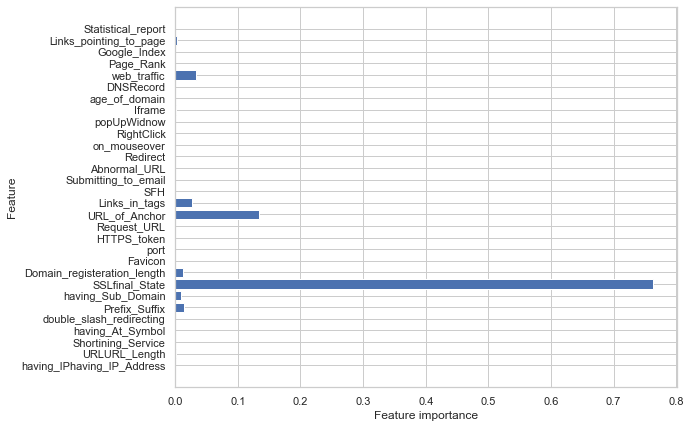

In [31]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [32]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# LOGISTIC REGRESSION

In [26]:
# instantiate the model 
model = LogisticRegression(max_iter=1000)
# fit the model 
model.fit(X_train,np.ravel(y_train,order='C'))
#predicting the target value from the model for the samples
y_predict= model.predict(X_test)
y_train_model = model.predict(X_train)
y_test_model = model.predict(X_test)
model_score=model.score(X_test, y_test)

Performance Evaluation:

In [27]:
#computing the accuracy of the model performance
acc_train_model = accuracy_score(y_train,y_train_model)
acc_test_model = accuracy_score(y_test,y_test_model)

print("LogisticRegression: Accuracy on the Model: ",model_score)
print("LogisticRegression: Accuracy on training Data: {:.3f}".format(acc_train_model))
print("LogisticRegression: Accuracy on test Data: {:.3f}".format(acc_test_model))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

LogisticRegression: Accuracy on the Model:  0.9348710990502035
LogisticRegression: Accuracy on training Data: 0.926
LogisticRegression: Accuracy on test Data: 0.935
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       989
           1       0.93      0.95      0.94      1222

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

[[ 907   82]
 [  62 1160]]


In [28]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LogisticRegression', acc_train_model, acc_test_model)

# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [33]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.926,0.935
1,Decision Tree,0.926,0.929


From the above comparision, it is clear that the Logistic Regression works well with this dataset. and can be used to further study the problem

In [35]:
# save Logistic Regression model to file for future improvement and for deployment
import pickle
pickle.dump(model, open("LogisticRegressionClassifier.pickle.dat", "wb"))
pickle.dump(model, open("phishing.pkl", "wb"))

This is an end of Project